In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Define the U-Net++ model
def build_unetplusplus(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # Encoder
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    # Add more encoder layers as needed...

    # Decoder
    up1 = layers.UpSampling2D(size=(2, 2))(pool2)
    concat1 = layers.Concatenate()([conv2, up1])
    conv3 = layers.Conv2D(128, 3, activation='relu', padding='same')(concat1)

    up2 = layers.UpSampling2D(size=(2, 2))(conv3)
    concat2 = layers.Concatenate()([conv1, up2])
    conv4 = layers.Conv2D(64, 3, activation='relu', padding='same')(concat2)

    # Add more decoder layers as needed...

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(conv4)  # Adjust output channels based on your task

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Load and preprocess the dataset
def load_dataset(images_folder, masks_folder):
    image_files = os.listdir(images_folder)
    mask_files = os.listdir(masks_folder)

    images = []
    masks = []

    for image_file in image_files:
        img_path = os.path.join(images_folder, image_file)
        img = load_img(img_path, color_mode='grayscale', target_size=(256, 256))
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        images.append(img_array)

    for mask_file in mask_files:
        mask_path = os.path.join(masks_folder, mask_file)
        mask = load_img(mask_path, color_mode='grayscale', target_size=(256, 256))
        mask_array = img_to_array(mask) / 255.0  # Normalize pixel values
        masks.append(mask_array)

    return np.array(images), np.array(masks)




In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Define the U-Net++ model
def build_unetplusplus(input_shape):
    inputs = tf.keras.Input(shape=input_shape)

    # Encoder
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    # Add more encoder layers as needed...

    # Decoder
    up1 = layers.UpSampling2D(size=(2, 2))(pool2)
    concat1 = layers.Concatenate()([conv2, up1])
    conv3 = layers.Conv2D(128, 3, activation='relu', padding='same')(concat1)

    up2 = layers.UpSampling2D(size=(2, 2))(conv3)
    concat2 = layers.Concatenate()([conv1, up2])
    conv4 = layers.Conv2D(64, 3, activation='relu', padding='same')(concat2)

    # Add more decoder layers as needed...

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(conv4)  # Adjust output channels based on your task

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Load and preprocess the dataset
def load_dataset(images_folder, masks_folder):
    image_files = os.listdir(images_folder)
    mask_files = os.listdir(masks_folder)

    images = []
    masks = []

    for image_file in image_files:
        img_path = os.path.join(images_folder, image_file)
        img = load_img(img_path, color_mode='grayscale', target_size=(256, 256))
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        images.append(img_array)

    for mask_file in mask_files:
        mask_path = os.path.join(masks_folder, mask_file)
        mask = load_img(mask_path, color_mode='grayscale', target_size=(256, 256))
        mask_array = img_to_array(mask) / 255.0  # Normalize pixel values
        masks.append(mask_array)

    return np.array(images), np.array(masks)




In [3]:
# Provide the correct paths to your image and mask folders
train_images_folder = r'C:\Users\soumya\Soumya Patra\\rectina image\\train\\image'
train_masks_folder = r'C:\Users\soumya\Soumya Patra\\rectina image\\train\\mask'
test_images_folder = r'C:\Users\soumya\Soumya Patra\\rectina image\\test\\image'
test_masks_folder = r'C:\Users\soumya\Soumya Patra\\rectina image\\test\\mask'


In [4]:
train_images, train_masks = load_dataset(train_images_folder, train_masks_folder)
test_images, test_masks = load_dataset(test_images_folder, test_masks_folder)

# Build and compile the U-Net++ model
input_shape = train_images[0].shape
model = build_unetplusplus(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_masks, epochs=10, batch_size=32, validation_data=(test_images, test_masks))

# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_masks)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 145s 43s/step - accuracy: 0.8587 - loss: 0.5991 - val_accuracy: 0.8770 - val_loss: 0.5062
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 140s 43s/step - accuracy: 0.8746 - loss: 0.4833 - val_accuracy: 0.8770 - val_loss: 0.4172
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 138s 43s/step - accuracy: 0.8770 - loss: 0.4114 - val_accuracy: 0.8770 - val_loss: 0.3822
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 145s 44s/step - accuracy: 0.8767 - loss: 0.3737 - val_accuracy: 0.8770 - val_loss: 0.3252
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 139s 43s/step - accuracy: 0.8774 - loss: 0.3131 - val_accuracy: 0.8770 - val_loss: 0.2781
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 138s 43s/step - accuracy: 0.8772 - loss: 0.2768 - val_accuracy: 0.8770 - val_loss: 0.2693
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 139s 43s/step - accuracy: 0.8772 - loss: 0.2720 - val_accuracy: 0.8770 - val_loss: 0.2676
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 140s 42s/step - accuracy: 0.8756 - loss: 0.2714 - val_accuracy: 0.8770 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


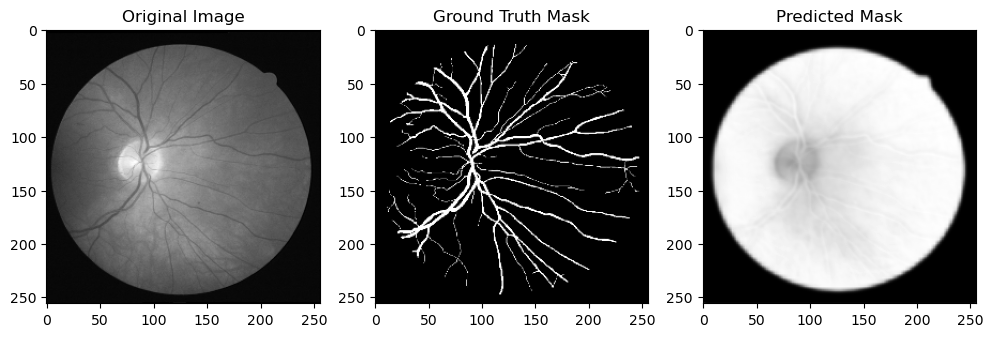

In [5]:
import matplotlib.pyplot as plt

# Assuming model is already defined and trained
# model = build_unetplusplus(input_shape)
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(train_images, train_masks, epochs=10, batch_size=32, validation_data=(test_images, test_masks))

# Make predictions on test images
predictions = model.predict(test_images)

# Choose a random test image index
index = np.random.randint(0, len(test_images))

# Display the original image, ground truth mask, and predicted mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(test_images[index][:, :, 0], cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(test_masks[index][:, :, 0], cmap='gray')
plt.title('Ground Truth Mask')

plt.subplot(1, 3, 3)
plt.imshow(predictions[index][:, :, 0], cmap='gray')
plt.title('Predicted Mask')

plt.show()



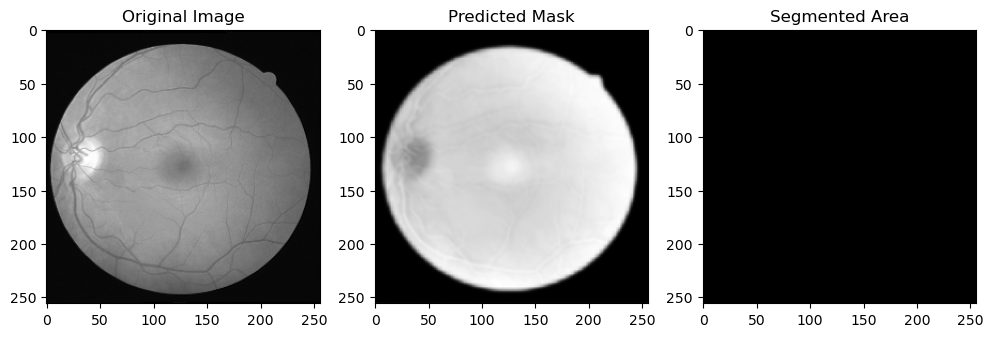

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming predictions and test_images are available
# predictions = model.predict(test_images)

# Choose a random test image index
index = np.random.randint(0, len(test_images))

# Original image
original_image = test_images[index][:, :, 0]

# Predicted mask
predicted_mask = predictions[index][:, :, 0]

# Threshold the predicted mask (adjust the threshold value as needed)
threshold = 0.5
binary_mask = (predicted_mask > threshold).astype(np.uint8)

# Apply the mask to the original image
segmented_area = cv2.bitwise_and(original_image, original_image, mask=binary_mask)

# Visualize the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(predicted_mask, cmap='gray')
plt.title('Predicted Mask')

plt.subplot(1, 3, 3)
plt.imshow(segmented_area, cmap='gray')
plt.title('Segmented Area')

plt.show()
